In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from python_analysis import *
import matplotlib.animation as animation
from numpy import random
from sklearn.linear_model import LinearRegression
from scipy.signal import argrelextrema

In [2]:
# impose dimensions of figures and font

plt.rcParams["figure.figsize"] = (25,15)
plt.rcParams.update({'font.size': 23})

# MOL for (1+1) dimensional system of equation

In [158]:
names = []

# we need informations to find the files:

# amplitudes vetor, contains the amplitudes of the file we want to analyze
amplitude_vector = [
    "9.000000"];

# time
range_time = 1
number_steps= 125
len_step = range_time / number_steps
times = np.arange(0,range_time+len_step,len_step)
times

epsilon = ["0.020000"]
    #"0.000000","0.900000","0.800000","0.700000","0.600000","0.500000","0.300000","0.200000","0.400000","0.050000","0.040000","0.030000","0.020000","0.010000","0.009000","0.008000","0.007000","0.006000","0.001000"]
dx = "0.010000"


model = "log_comp"
ns = 30
shift = 29
for i in range(shift,ns):
    for e in range(len(epsilon)):
        for a in range(len(amplitude_vector)):
            names.append("./data/"+model+"/data"+str(i)+"/ampl_"+amplitude_vector[a]+"_eps"+epsilon[e]+"_dx_"+dx+"steps"+str(number_steps)+".csv") 

len(names)


1

In [159]:
print(names[0])

./data/log_comp/data29/ampl_9.000000_eps0.020000_dx_0.010000steps125.csv


In [160]:
big_DF = []

In [161]:
%%time
h1 = float(dx)
h2 = h1/2
h3 = h2/2
domain_lenght = 2.5
gl = 2
gr = 2
N_point1 = int(domain_lenght/h1+1)+gl+gr
N_point2 = int(domain_lenght/h2+1)+gl+gr
N_point3 = int(domain_lenght/h3+1)+gl+gr
print(N_point1,N_point2,N_point3)
#big_DF = []
for n in range (0, len(names[:])):
    DF1, DF2, DF3 = [], [], []
    for i in range (0,number_steps):
        DF1.append( pd.read_csv(names[n],skiprows = (N_point1+1)*i,nrows =N_point1) )
        DF2.append( pd.read_csv(names[n],skiprows = (N_point1+1)*(number_steps+1)+ (N_point2+1)*i,nrows =N_point2) )
        DF3.append( pd.read_csv(names[n],skiprows = (N_point1+1)*(number_steps+1)+ (N_point2+1)*(number_steps+1)+(N_point3+1)*i,nrows =N_point3) )
    big_DF.append([DF1,DF2,DF3])
    print("run:"+str(n)+names[n]+ " added")
print("number of runs:",len(big_DF))

255 505 1005
run:0./data/log_comp/data29/ampl_9.000000_eps0.020000_dx_0.010000steps125.csv added
number of runs: 1
CPU times: user 4.31 s, sys: 110 ms, total: 4.42 s
Wall time: 4.42 s


In [162]:
# big_Df index:
# big_DF[run][dx][time]
big_DF[0][1][124]

,x,field0,field1
0,-0.010,4.018150e-05,4.961360e-06
1,-0.005,3.426290e-05,-3.658570e-06
2,0.000,3.680970e-05,-2.901620e-30
3,0.005,3.426290e-05,3.658570e-06
4,0.010,4.018150e-05,-4.961360e-06
...,...,...,...
500,2.490,-1.041360e-15,1.046900e-15
501,2.495,-8.224560e-16,8.251670e-16
502,2.500,-6.537380e-16,6.537380e-16
503,2.505,-5.143480e-16,5.115840e-16


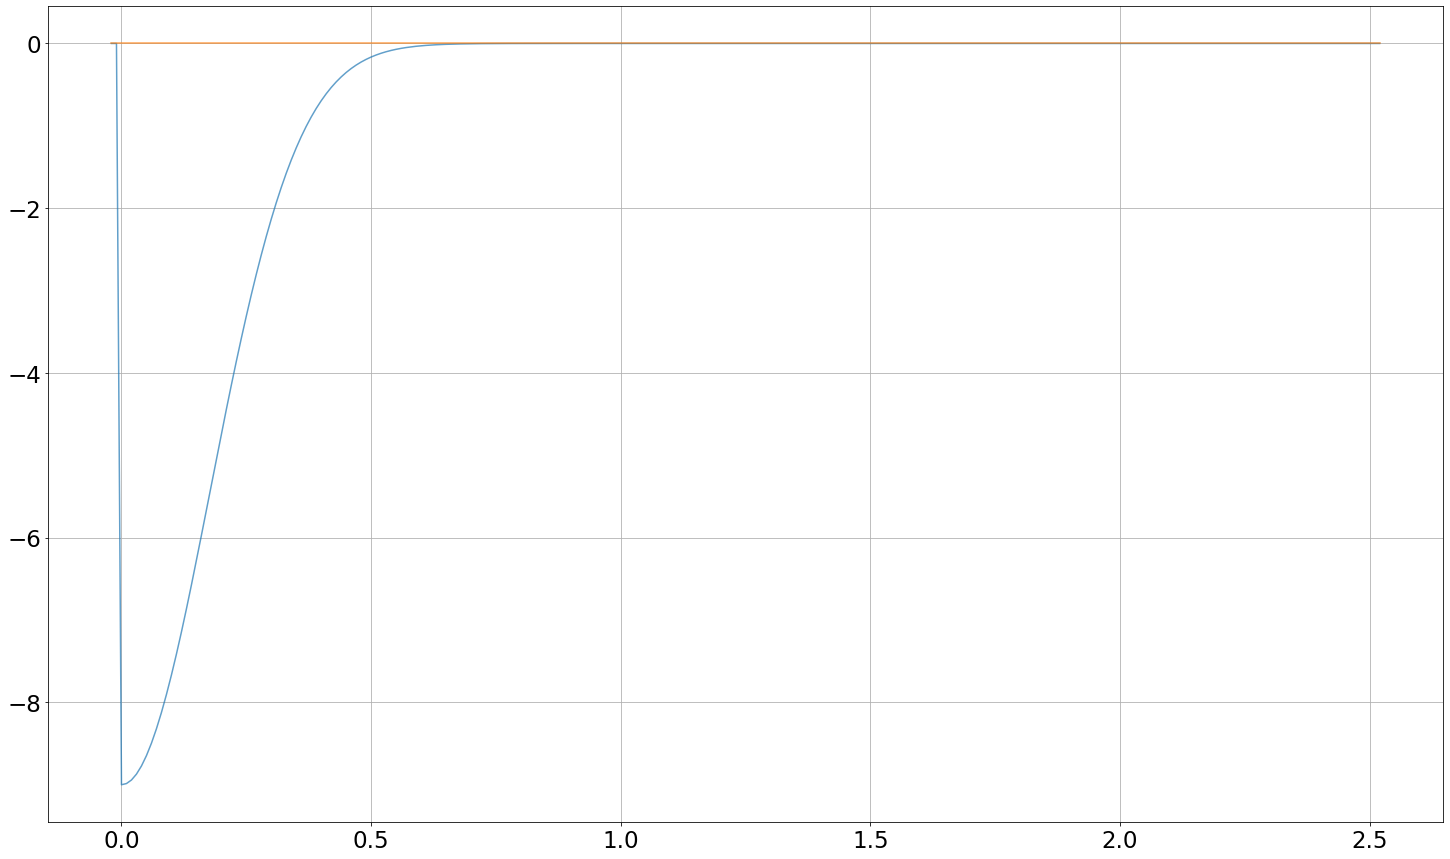

In [163]:
### for n in range(0,1):
for i in range(0,1):
        plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field0'],alpha=0.7,markersize=25)
        plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field1'],alpha=0.7,markersize=25)
        #plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field2'],alpha=0.7,markersize=25)


#plt.legend()
plt.grid()
#plt.xlim([0, 4])
#plt.ylim([-0.00001, 0.00001])

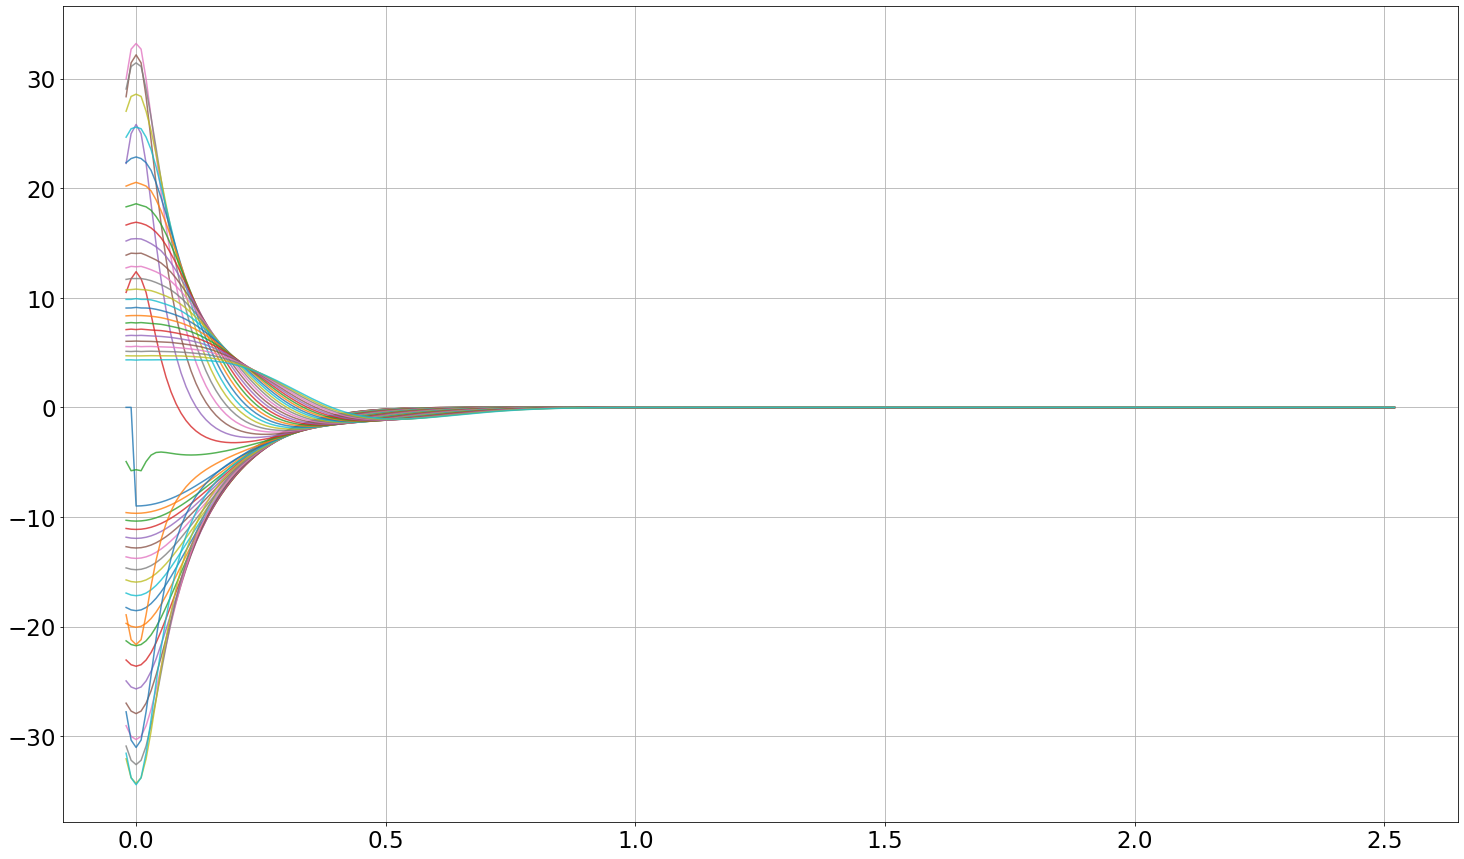

In [166]:
for n in [0]:
    for i in range(0,1):        
        for j in range(0,50):
            #plt.plot(X[j],big_DF[n][i][j]['field0'],alpha=0.6,markersize=15,label="time:"+str(times[j])+"e:"+amplitude_vector[n])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],alpha=0.8,markersize=15)
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field1'],'+-',alpha=0.4,markersize=8)
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],alpha=0.8,markersize=8)
            #plt.plot(big_DF[n][i][j]['x'],model1_gaussian_solution(big_DF[n][i][j]['x'],times[j],-float(amplitude_vector[n])),'+',alpha=0.4,label="teo,time:"+str(times[j]))

            

            
plt.grid()
#plt.xlim([-0.056,0.2])
#plt.ylim([ -19,-30] )
#plt.legend()
#times[163]

/home/giulio/Università/Thesis/code/python_analysis.py:71: RuntimeWarning: invalid value encountered in double_scalars
  return(np.log(norm_diff_1/norm_diff_2)/np.log(2.0))


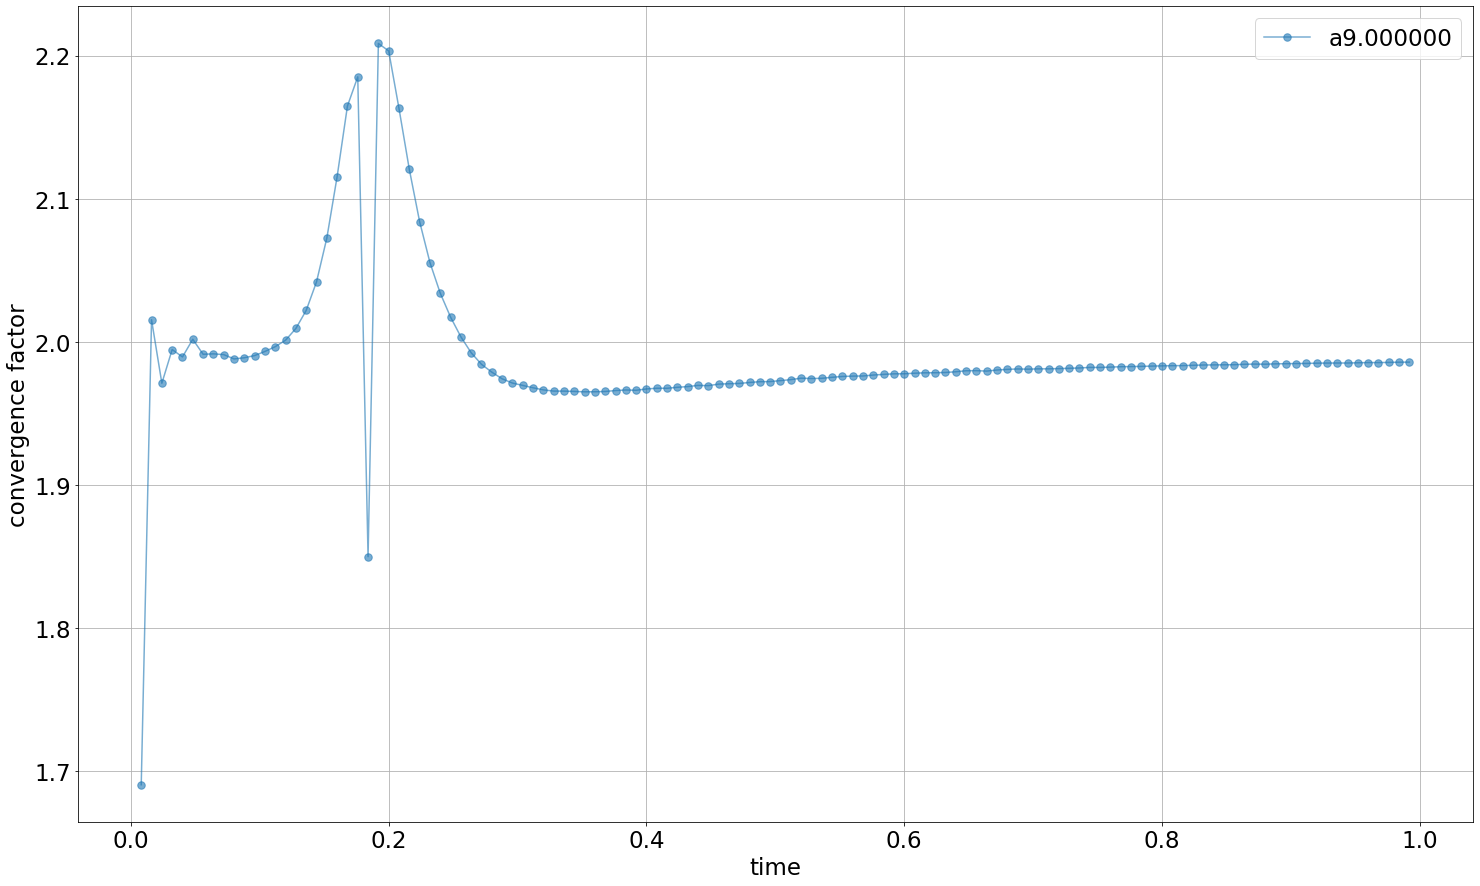

In [165]:
allruns_self_conv_test_vect = []
self_conv_test_vect = []
"""
for i,t in enumerate(times[::2]):
        self_conv_test_vect.append(self_conv_test(big_DF[0][0][i],big_DF[0][1][i],big_DF[0][2][i]))
        allruns_self_conv_test_vect.append(self_conv_test_vect)
#plt.plot(times[::2], self_conv_test_vect,markersize=10,alpha=0.5,label=label_vector[0])
"""
for n in [0]:
    self_conv_test_vect = []
    for i,t in enumerate(times[0:-1]):
        self_conv_test_vect.append( self_conv_test_spherical(big_DF[n][0][i],big_DF[n][1][i],big_DF[n][2][i],gl,gr) )
    allruns_self_conv_test_vect.append(self_conv_test_vect)
    plt.plot(times[0:-1], self_conv_test_vect,'.-',markersize=15,alpha=0.6,label="a"+amplitude_vector[n])
#plt.xlim(0,5)
#plt.ylim(0,3)
#plt.xlabel('time')
plt.ylabel('convergence factor')
plt.xlabel('time')
#plt.vlines(0.652,0,5,alpha=0.5,label="time = 9.4")
#plt.hlines(2,0,12,alpha=0.5,label="time = 9.4")

plt.grid()
plt.legend()

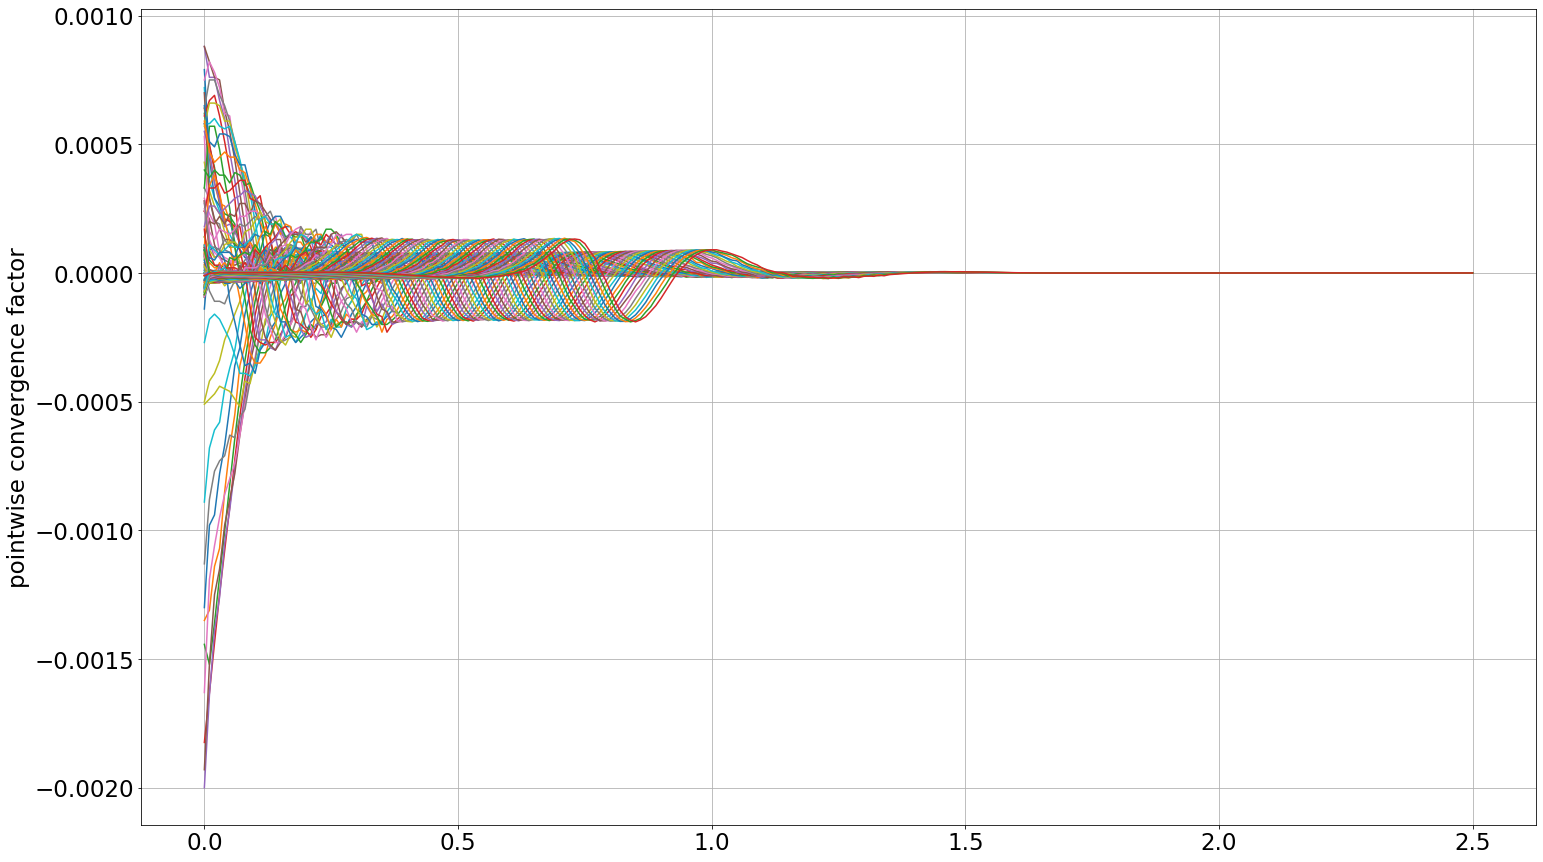

In [110]:
n_ind = 0
self_conv_test_vect_pw = []
for j in range(0,number_steps-1):
    self_conv_test_vect_pw.append(self_conv_test_pw(big_DF[n_ind][0][j], big_DF[n_ind][1][j], big_DF[n_ind][2][j],gl,gr))
    plt.plot(big_DF[n_ind][0][0]['x'][gl:-gr],self_conv_test_vect_pw[j][0]-self_conv_test_vect_pw[j][1],markersize=15)
    #plt.hlines(np.mean(self_conv_test_vect_pw[j]),-5,5,alpha=0.4)

#plt.plot(times,self_conv_test_vect_pw,label="conv_test")
#plt.xlim(-3.5,-3.7)
#plt.ylim(1.95,2.1)
#plt.xlabel('time')
plt.ylabel('pointwise convergence factor')
plt.grid()
#plt.legend()
#print(self_conv_test_vect_pw[-24])

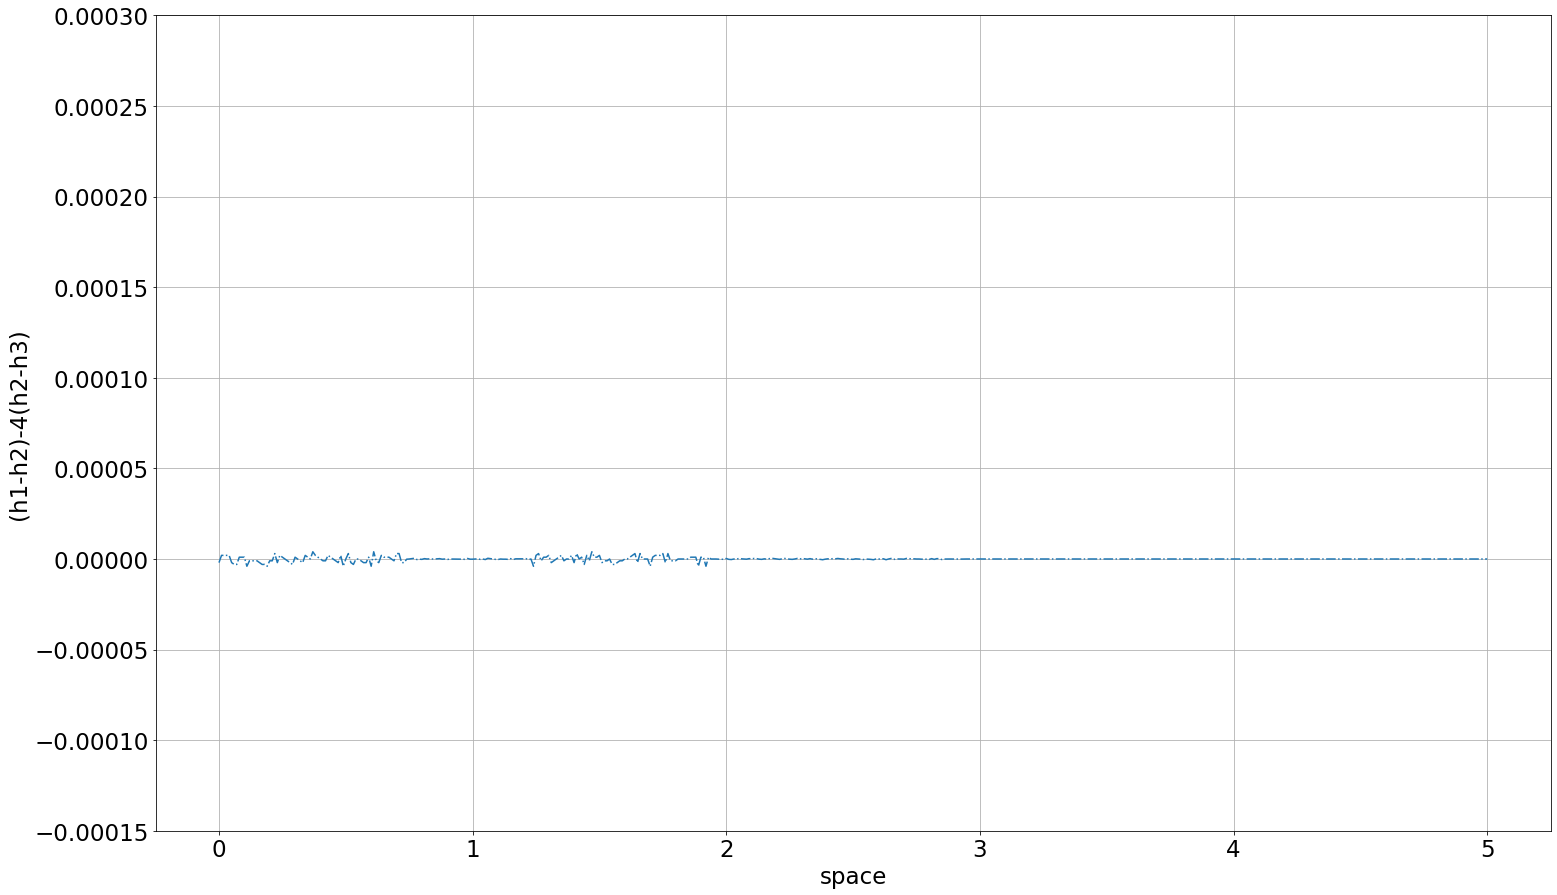

In [11]:
fig, ax = plt.subplots()

line1, = ax.plot(big_DF[n_ind][0][1]['x'][gl:-gr], self_conv_test_vect_pw[1][0]-self_conv_test_vect_pw[1][1],'-.')
#line2, = ax.plot(DF[0][1]['x'], self_conv_test_vect_pw[1][1],'.')
plt.grid()
plt.ylim(-0.00015,0.0003)
plt.xlabel('space')
plt.ylabel('(h1-h2)-4(h2-h3)')

def animate1(i):
    line1.set_ydata(self_conv_test_vect_pw[i][0]-self_conv_test_vect_pw[i][1])  # update the data.
    return line1,

#def animate2(i):
#    line2.set_ydata(self_conv_test_vect_pw[i][0])  # update the data.
#    return line2,


ani = animation.FuncAnimation(
    fig, animate1, interval=80, blit=True, frames=number_steps-1)
ani.save("pw_conv.mp4")



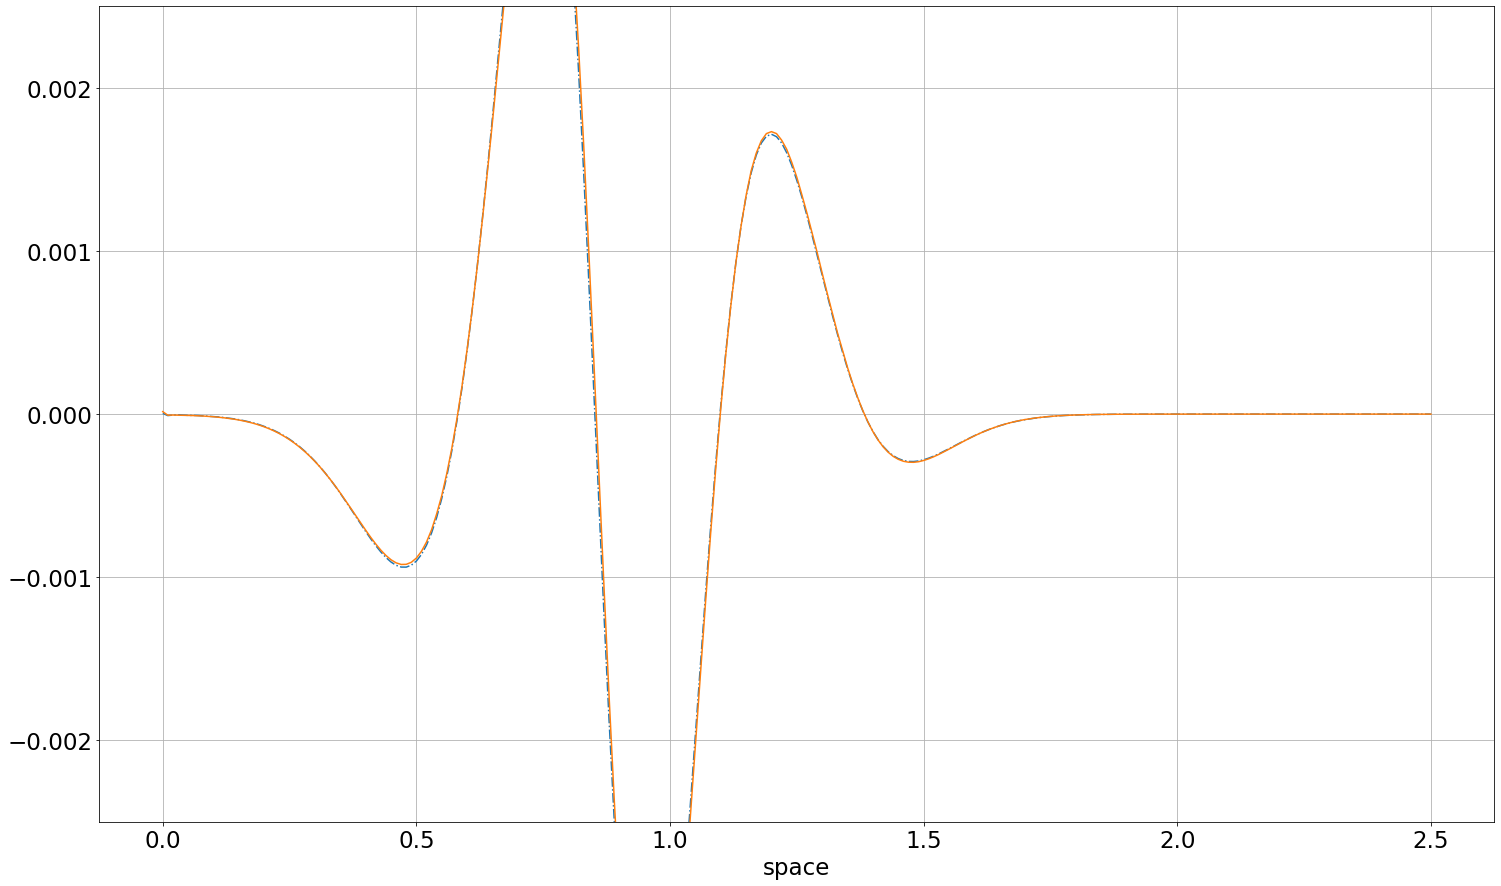

In [171]:
fig, ax = plt.subplots()

line1, = ax.plot(big_DF[n_ind][0][1]['x'][gl:-gr], self_conv_test_vect_pw[1][0],'-.')
line2, = ax.plot(big_DF[n_ind][0][1]['x'][gl:-gr], self_conv_test_vect_pw[1][1])
plt.grid()
plt.ylim(-0.0025,0.0025)
plt.xlabel('space')
#plt.ylabel('(h1-h2)-4(h2-h3)')
data_name = "./data/"+model+"/data"+str(shift)+"/amplitude_"+str(amplitude_vector[n_ind])+"_pointwise_convergence.mp4"

def animate1(i):
    line1.set_ydata(self_conv_test_vect_pw[i][0])  # update the data.
    line2.set_ydata(self_conv_test_vect_pw[i][1])
    return line1,line2

#def animate2(i):
 #   line2.set_ydata(self_conv_test_vect_pw[i][1])  # update the data.
  #  return line2,


ani = animation.FuncAnimation(
    fig, animate1, interval=80, blit=True, frames=number_steps-1)
ani.save(data_name)



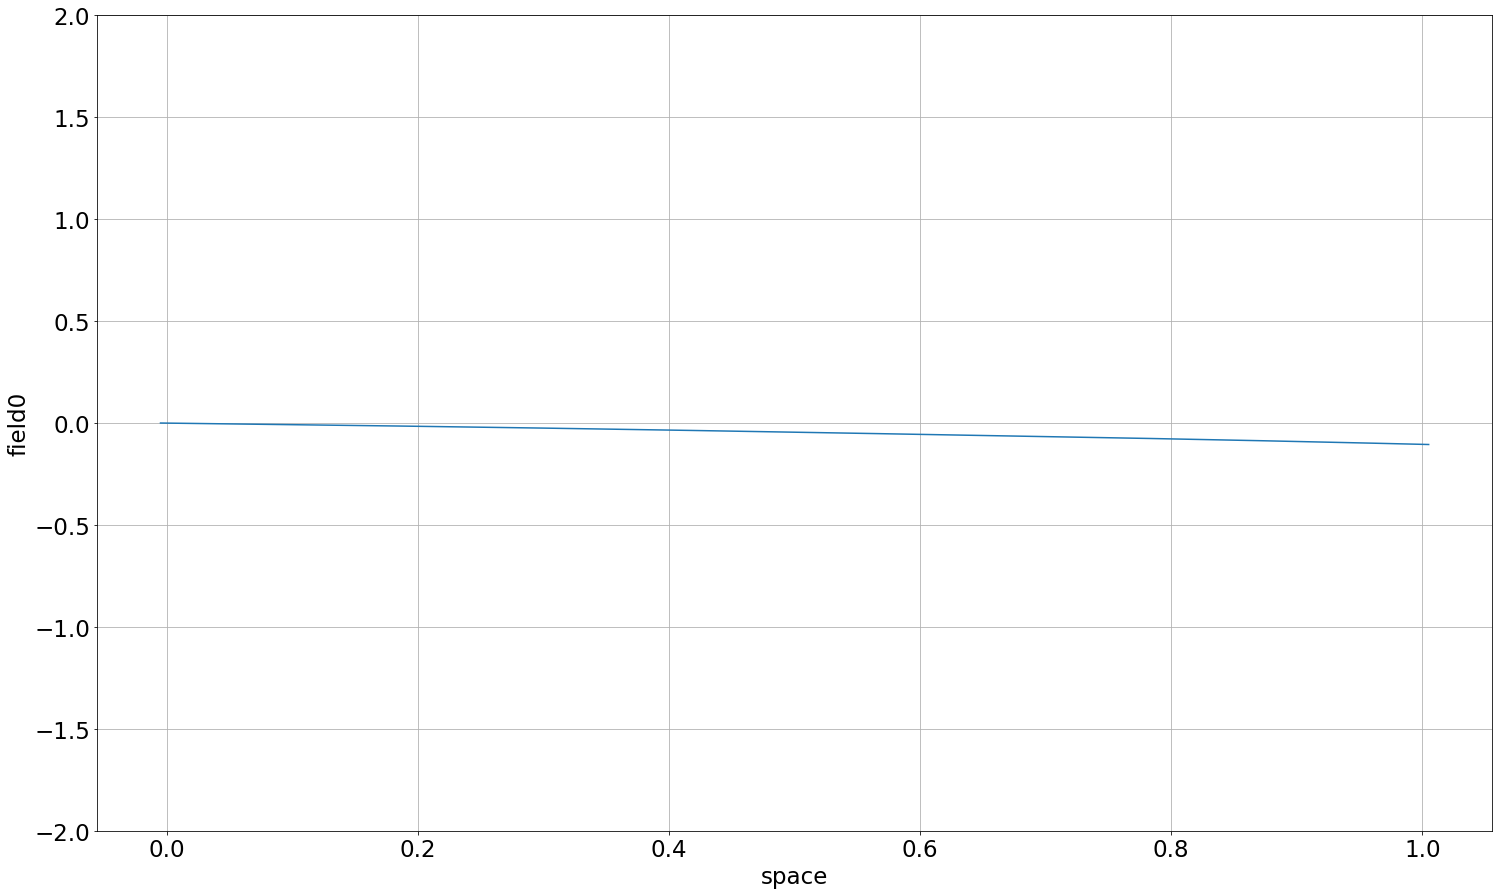

In [130]:
fig, ax = plt.subplots()
field = 0
h_ind = 2
big_DF_ind = 0
data_name = "./data/"+model+"/data"+str(shift)+"/field"+str(field)+".mp4"
line, = ax.plot(big_DF[big_DF_ind][h_ind][0]['x'], big_DF[big_DF_ind][h_ind][0]['field'+str(field)])
plt.ylim(-2,2)
plt.xlabel('space')
plt.ylabel('field'+str(field))
#plt.xlim(-5,0)
plt.grid()

def animate(i):
    #line.set_xdata(DF[0][i]['x'])
    line.set_ydata(big_DF[big_DF_ind][h_ind][i]['field'+str(field)])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=100, blit=True, save_count=number_steps-1)
ani.save(data_name)



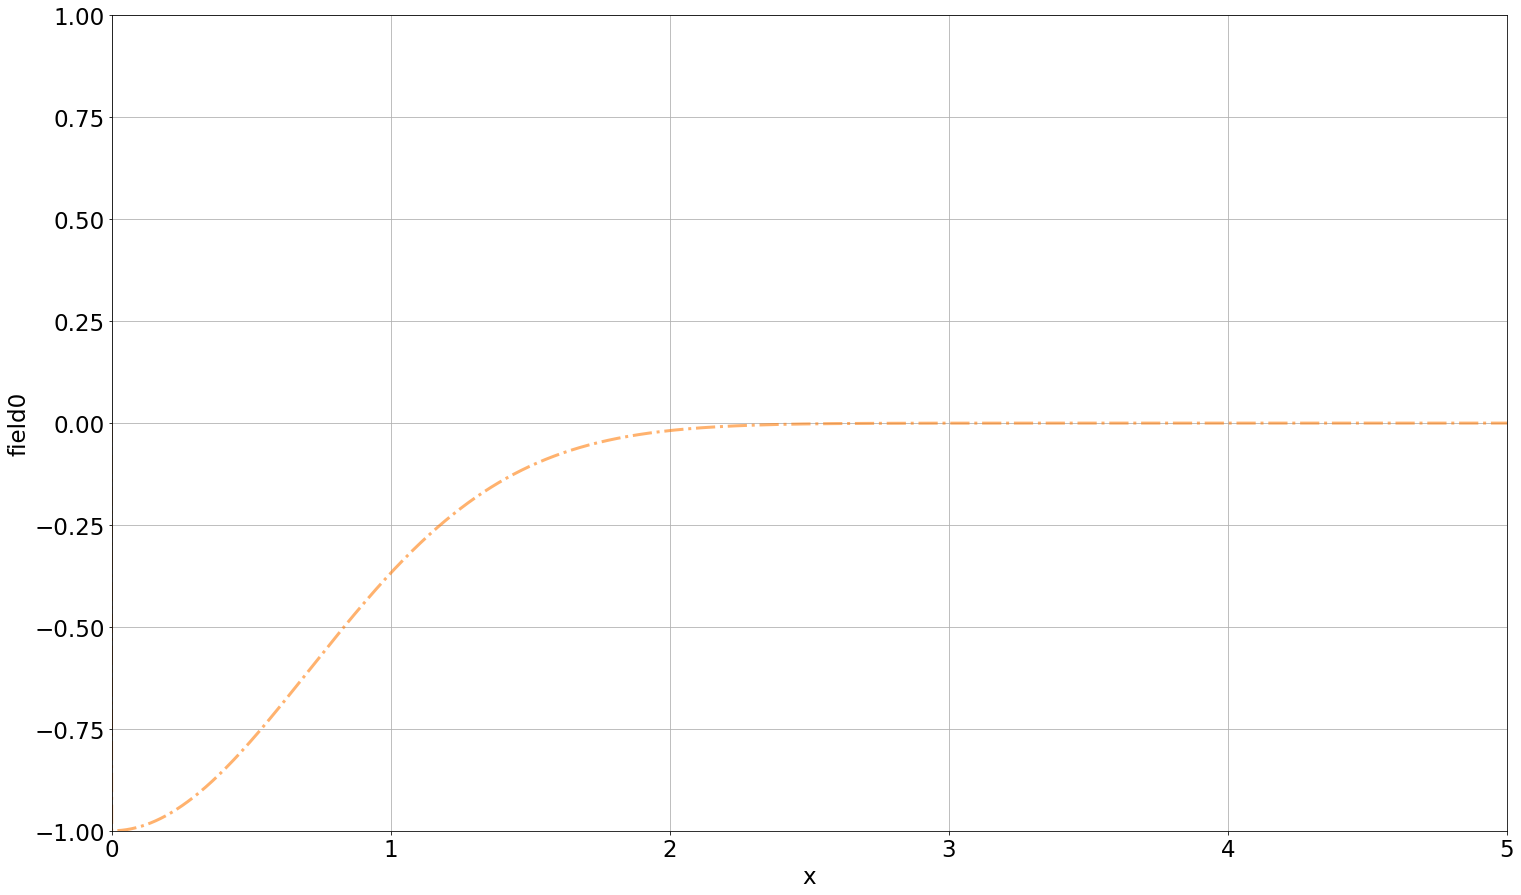

In [176]:
fields_to_print = [0]
h_ind = 2
data_name = "./data/"+model+"/data"+str(shift)+"/fields.mp4"
fig = plt.figure()
ax1 = plt.axes(ylim=(-1,1),xlim=(0,domain_lenght))
line, = ax1.plot([], [])
plt.xlabel('x')
plt.ylabel('field0')
plotlays = [fields_to_print]
lines = []
for index in (fields_to_print):
    lobj = ax1.plot([],[],'-.',lw=3,alpha=0.6)[0]
    lines.append(lobj)

x = []
y = []
for i in (fields_to_print):
    x.append([big_DF[0][h_ind][0]['x']]),
    y.append([ big_DF[0][h_ind][0]['field0']])


def init():
    for line in lines:
        line.set_data(x,y)      
        #line.set_data([x1,x2,x3,x4,x5,x6,x7],[y1,y2,y3,y4,y5,y6,y7])
    return lines





def animate(i):
    for n,j in enumerate (fields_to_print):
        x[n] = big_DF[j][h_ind][0]['x']
        y[n] = big_DF[j][h_ind][i]['field0']
        
    

    xlist = x
    ylist = y

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=number_steps-1, interval=50, blit=True)

plt.grid()
plt.show()
anim.save(data_name)

In [125]:
maximums = runs_maximums_vector(big_DF,2,'field0')
amplitudes_vector = []
for n in range(len(names)):
    amplitudes_vector.append(float(names[n][25:33]))
print('amplitudes:',amplitudes_vector)
for i in range(len(amplitudes_vector)):
    amplitudes_vector[i] = 2.3316439816- amplitudes_vector[i]
amplitudes_for_fit = -np.log(amplitudes_vector[:]).reshape((-1, 1))
line_model = LinearRegression()
line_model.fit(amplitudes_for_fit,np.log(maximums))
print("maximum",maximums)
print('intercept:',line_model.intercept_,'angular coefficient', line_model.coef_)

amplitudes: [2.301447, 2.30432, 2.30692, 2.309273, 2.311402, 2.313328, 2.315071, 2.316648, 2.318075, 2.319367, 2.320535, 2.321592, 2.322549, 2.323414, 2.324197, 2.324906, 2.325547, 2.326127, 2.326652, 2.327127, 2.327557, 2.327946, 2.328298, 2.328616, 2.328905, 2.329165, 2.329401, 2.329615, 2.329808, 2.329982, 2.330141, 2.330284, 2.330413, 2.33053, 2.330636, 2.330732, 2.330819, 2.330897, 2.330968, 2.331033, 2.331091, 2.331144, 2.331191, 2.331234, 2.331273]
maximum [12.0807, 12.4184, 12.7257, 13.004000000000001, 13.2605, 13.5152, 13.7485, 13.9616, 14.1559, 14.3329, 14.4936, 14.6395, 14.7719, 14.8918, 15.869000000000002, 18.3121, 20.8663, 23.5147, 26.2377, 29.0109, 31.8114, 34.6114, 37.3852, 40.1016, 42.7515, 45.2843, 47.7009, 49.9797, 52.0932, 54.03, 55.8076, 57.3932, 58.793, 60.0181, 61.0725, 61.9639, 62.7031, 63.2954, 63.7636, 64.12100000000001, 65.5274, 85.2999, 108.947, 138.048, 173.488]
intercept: 0.3374544725878046 angular coefficient [0.55374593]


Text(0, 0.5, 'maximum PI overall times')

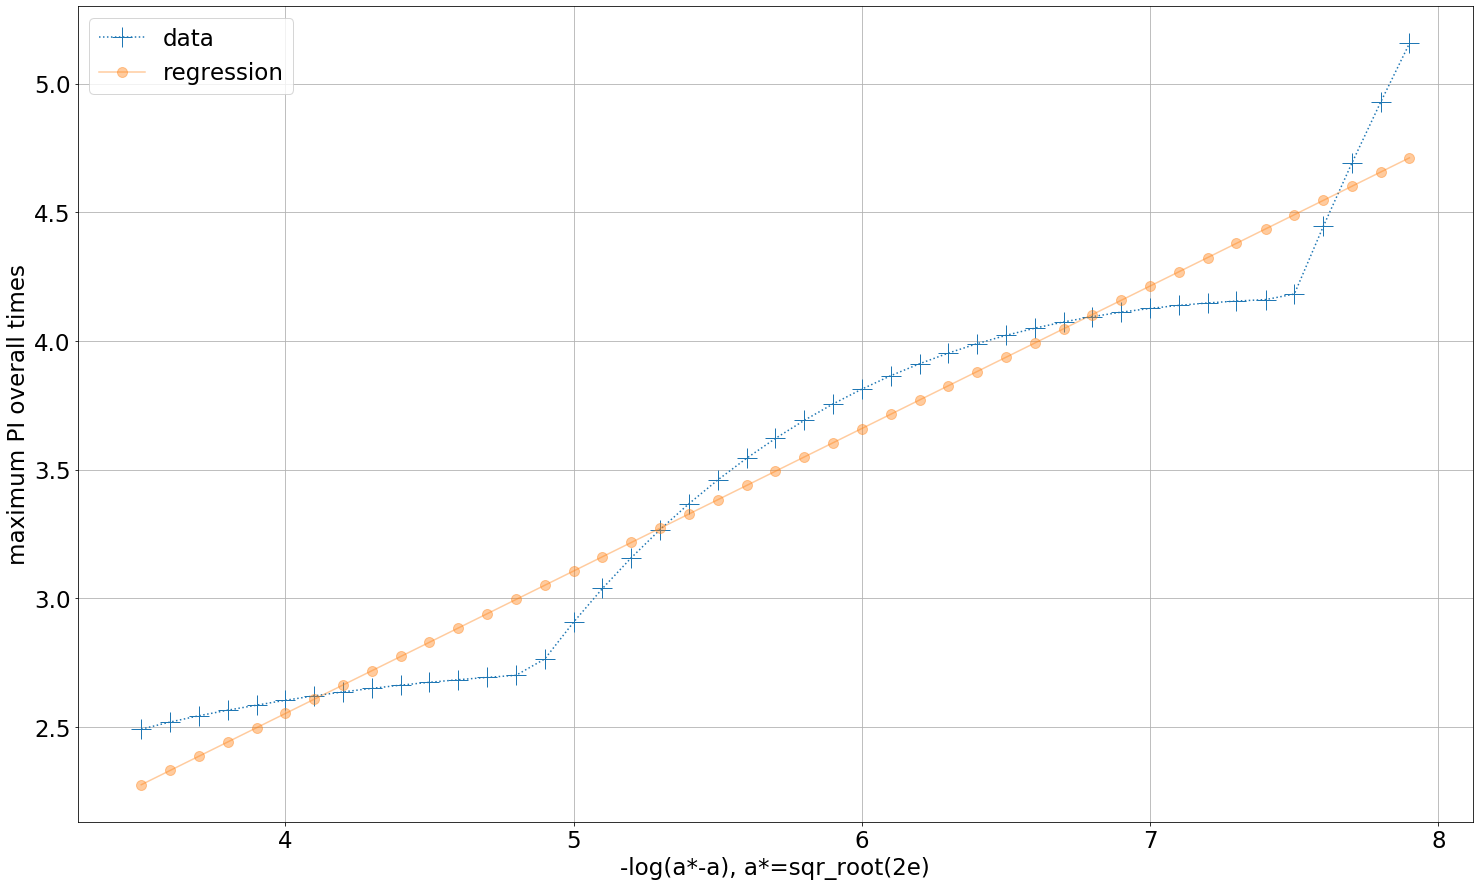

In [126]:
plt.plot(-np.log(amplitudes_vector),np.log(maximums),'+:',markersize=20,alpha=1,label='data')
plt.plot(-np.log(amplitudes_vector),line_model.predict(-np.log(amplitudes_vector).reshape(-1,1)),'.-',markersize=20,alpha=0.4,label='regression')
plt.grid()
plt.legend()
plt.xlabel('-log(a*-a), a*=sqr_root(2e)')
plt.ylabel('maximum PI overall times')


In [93]:
amplitudes_vector_creator(6.4,7,2.3316439816,0.15)

array([2.32998242, 2.33021387, 2.33041307, 2.33058453])

In [157]:
np.sqrt(np.e/2)*2*4

9.326575926388497